# Visualizing Crypto Price Data using Line chart 


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
        

In [16]:
def currentRate(symbol, comparison_symbol=['USD'], exchange = ''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
        .format(symbol.upper(), ','.join(comparison_symbol).upper())
    if exchange:
        url += '&e={}' .format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

BTCPrice = currentRate('BTC')
ETCPrice = currentRate('ETC')

print(BTCPrice)
print(ETCPrice)

{'USD': 11115.67}
{'USD': 30.13}


In [53]:
def minuteRateHistory(cryptocurrency, comparisoncurrency = ['USD'], limit = 60, aggregate = 1, all_data = False):
    historyUrl = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit=60&aggregate=3&e=CCCAGG'\
        .format(cryptocurrency.upper(), ','.join(comparisoncurrency).upper())
    getdetails = requests.get(historyUrl)
    data = getdetails.json()['Data']
    df= pd.DataFrame(data)
    df['timestamp']=[datetime.datetime.fromtimestamp(d) for d in df.time]
    return df
    

In [54]:
def graph(cryptocurrency, comparisoncurrency, limit = 60, aggregate = 1, all_data = False):
    data= minuteRateHistory(cryptocurrency, comparisoncurrency = ['USD'], limit = 60, aggregate = 1, all_data = False)
    
    plt.plot(data.time, data.close)
    plt.title(cryptocurrency + ' to '+comparisoncurrency)
    plt.ylabel('Prices in '+cryptocurrency)
    plt.xlabel('Time in miliseconds')
    plt.show()

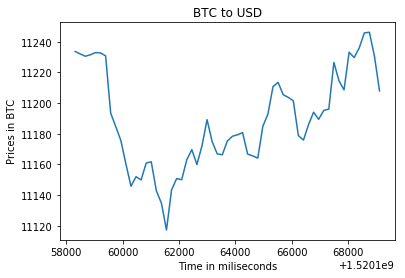

In [55]:
graph('BTC', 'USD')

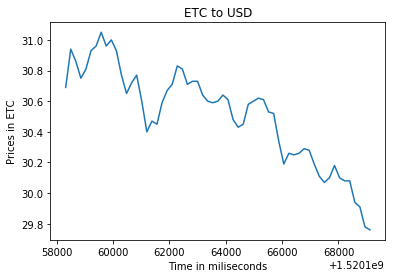

In [56]:
graph('ETC','USD')

# RealTimeUpdateOfGraph

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


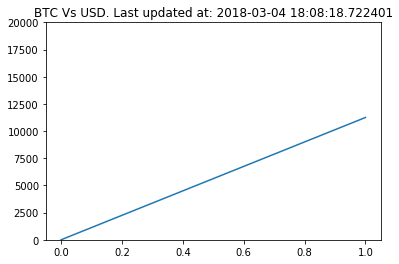

NameError: name 'time' is not defined

In [48]:
x=[0]
y=[0]
fig = plt.gcf()
fig.show()
fig.canvas.draw()
plt.ylim([0, 20000])
i=0
while(True):
    data = currentRate('BTC')
    i+=1
    x.append(i)
    y.append(data['USD'])
    plt.title("BTC Vs USD. Last updated at: "+str(datetime.datetime.now()))
    plt.plot(x,y)
    plt.show()

    fig.canvas.draw()
    plt.pause(500)